# 02 Camera and ray

* 카메라의 파라미터들을 기반으로 ray를 생성하고 ray를 기반으로 이미지를 그리는 예제 입니다.

In [1]:
import numpy as np
import numpy.linalg as LA

import matplotlib.pyplot as plt

* normalize는 벡터를 벡터의 크기로 나눠주는 함수입니다.
  * 나눗셈 연산에서 0으로 나누는 것을 방지하기 위해 분모에 epsilon을 더해줍니다.
* blend는 두 개의 색을 t를 기반으로 linear하게 섞어주는 함수입니다.

In [2]:
def normalize(vec: np.array, eps: float = 1e-6):
  return vec/(LA.norm(vec) + eps) 

def blend(color1: np.array, color2: np.array, t: float):
  return (1.0 - t)*color1 + t*color2

* Ray는 시작 지점(origin)에서 특정 방향(direction)으로 향하는 광선을 나타내는 자료 구조입니다.
  * ditrection은 unit vector 입니다.
  * at은 시작 지점에서 방향으로 t배 만큼 이동한 위치를 계산하는 함수입니다. - 이 예제에서는 사용되지 않습니다.  
* vector와 point의 연산
  * vector + vector = vector
  * vector - vector = vector
  * point + vector = point
  * point - vector = point
  * point - point = vector
  * point + point = 정의 안됨

In [3]:
class Ray:
  def __init__(self, origin: np.array, direction: np.array) -> None:
    self.origin = origin    
    self.direction = normalize(direction)
    
  def at(self, t: float) -> np.array:
    return self.origin + t*self.direction

ray의 direction의 y 값을 기준으로 두 개의 색을 썩어서 ray의 색을 결정하는 함수입니다.

In [4]:
def ray_color(ray: Ray) -> np.array:
  t = 0.5*(ray.direction[1] + 1.0)
  color1 = np.array([1.0, 1.0, 1.0])
  color2 = np.array([0.5, 0.7, 1.0])
  return blend(color1=color1, color2=color2, t=t)

In [5]:
# image
aspect_ratio = 16.0 / 9.0
image_height = 200
image_width = int(aspect_ratio*image_height)

image = np.zeros([image_height, image_width, 3])

* 카메라 파라미터
  * viewport의 height는 2로 잡고 width는 이미지의 종횡비와 viewport의 height로 계산합니다.
  * focal length는 카메라 중심(center of projection, 카메라 중심)으로 부터 이미지 평면까지의 거리입니다.
* 카메라의 중심(또는 투영의 중심)은 [0,0,0] 입니다.
* horizontal vector는 카메라의 중심에서 x축 방향으로 viewport의 width만큼 이동하는 벡터입니다.
* vertical vector는 카메라의 중심에서 y축 방향으로 viewport의 height만큼 이동하는 벡터입니다.
* backward vector는 카메라의 중심에서 z축 방향으로 focal length만큼 이동하는 벡터입니다.
* lower left corner는 이미지 평면의 기준인 왼쪽 아래의 위치를 나타냅니다.

<img src="./images/camera_geometry.png" width="500px" height="250px" title="camera geometry"/>

In [6]:
# camera
viewport_height = 2.0
viewport_width = aspect_ratio * viewport_height
focal_length = 1.0

camera_origin = np.array([0.0, 0.0, 0.0])
horizontal_vec = np.array([viewport_width, 0.0, 0.0])
vertical_vec = np.array([0.0, viewport_height, 0.0])
backward_vec = np.array([0.0, 0.0, focal_length])
lower_left_corner = camera_origin - horizontal_vec/2.0 - vertical_vec/2.0 - backward_vec

* 이미지 평면의 각 픽셀에 해당하는 uv 좌표계를 계산하고 uv 좌표계로 부터 ray를 생성합니다.
* 생성된 ray를 함수에 넣어서 픽셀의 색상을 계산합니다.

<img src="./images/uv_and_ray.png" width="500px" height="250px" title="uv coordinate and ray"/>

In [7]:
%%time

for row in range(image_height):
  for col in range(image_width):
    u = float(col) / (image_width - 1)
    v = float(row) / (image_height - 1)

    ray = Ray(origin=camera_origin,
              direction=(lower_left_corner + u*horizontal_vec + v*vertical_vec) - camera_origin)

    image[row, col] = ray_color(ray)

CPU times: user 1.27 s, sys: 35 ms, total: 1.31 s
Wall time: 1.3 s


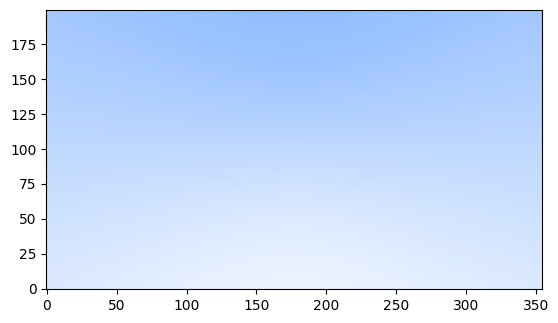

In [8]:
plt.imshow(image, origin='lower')
plt.show()